# Default run model loading and inference

In [10]:
import os
from comet_ml.api import API, APIExperiment

# Define your workspace, project, and experiment details
workspace_name = "aiigoradam"
project_name = "yolo11-flickr"
experiment_name = "run_default"

api = API()

# Retrieve experiments that match the specified pattern
experiments = api.get_experiments(
    workspace=workspace_name,
    project_name=project_name,
    pattern=experiment_name
)

if not experiments:
    raise ValueError("No experiments found matching the specified pattern.")

# Use the first matching experiment
experiment_key = experiments[0].id

# Create an APIExperiment instance to access logged assets
api_experiment = APIExperiment(previous_experiment=experiment_key)

asset_name = "best.pt"  

# Fetch the asset using get_asset_by_name
response = api_experiment.get_asset_by_name(asset_name, return_type="response", stream=True)

if response is None:
    raise ValueError(f"Asset '{asset_name}' was not found in the experiment.")

local_file_path = os.path.join(".", asset_name)
with open(local_file_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)
print(f"Downloaded model to: {local_file_path}")


Downloaded model to: .\best.pt



image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\2616561200.jpg: 576x640 1 pet, 27.9ms
Speed: 5.0ms preprocess, 27.9ms inference, 4.0ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\269630255.jpg: 480x640 1 pet, 22.9ms
Speed: 4.0ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\3352791995.jpg: 640x416 2 persons, 18.9ms
Speed: 1.0ms preprocess, 18.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\325576658.jpg: 448x640 1 person, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


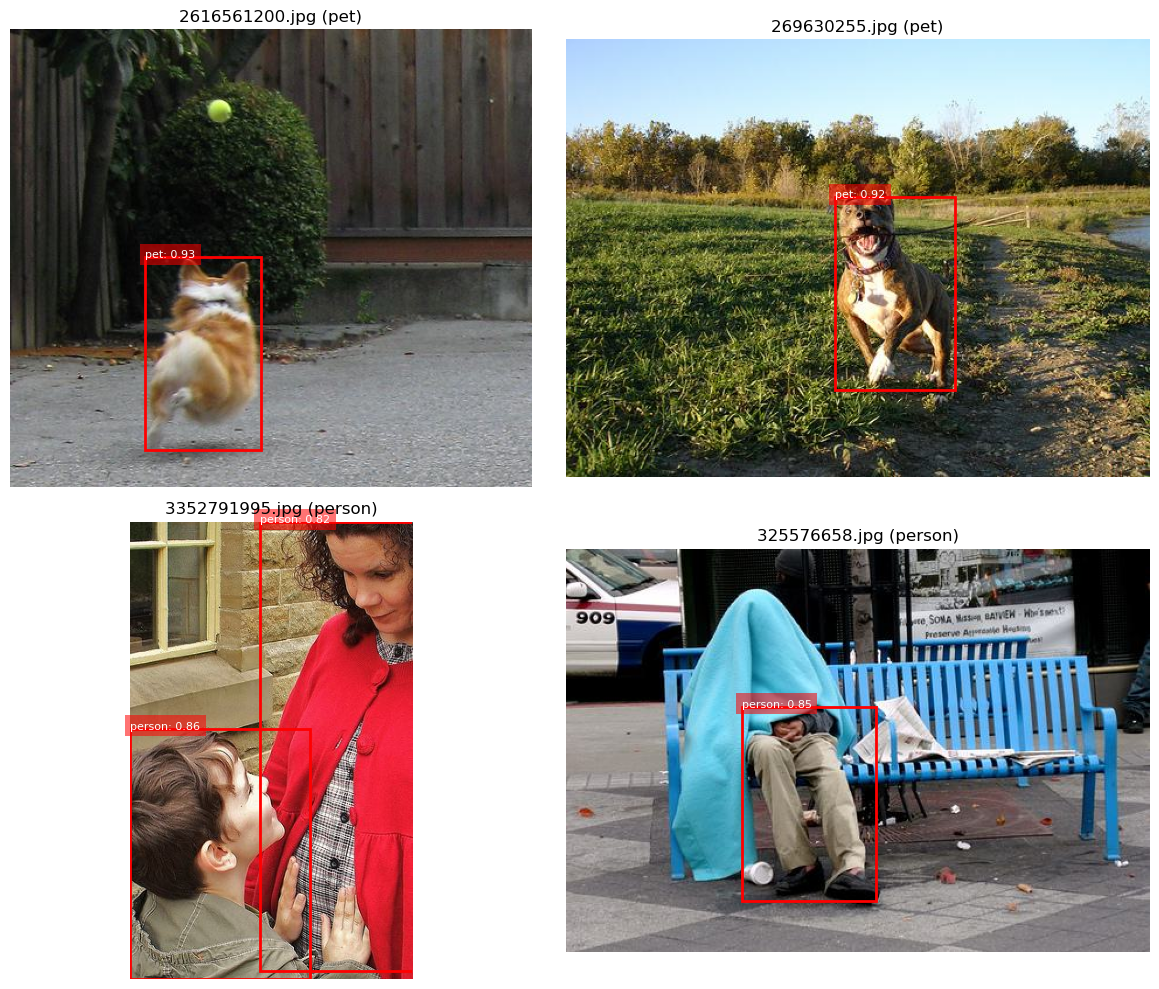

In [ ]:
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO

def plot_bbox(ax, image, data, title="YOLO Prediction"):
    """Plots bounding boxes on an image using Matplotlib."""
    ax.imshow(image)
    ax.set_title(title, fontsize=12)
    
    # Plot each bounding box
    for bbox, label, conf in zip(data['bboxes'], data['labels'], data['confidences']):
        x1, y1, x2, y2 = bbox
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        text = f"{label}: {conf:.2f}"
        ax.text(x1, y1, text, color='white', fontsize=8, 
                bbox=dict(facecolor='red', alpha=0.55, edgecolor='none'))
    
    ax.axis('off')

def get_predictions(image_path):
    """Runs YOLO inference and returns bounding box data."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    predictions = model.predict(source=image_path)
    
    data = {'bboxes': [], 'labels': [], 'confidences': []}
    for result in predictions:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            confidence = box.conf[0].item()
            
            data['bboxes'].append((x1, y1, x2, y2))
            data['labels'].append(model.names[class_id])
            data['confidences'].append(confidence)
    
    return image, data

random.seed(35)  # Set seed for reproducibility

# Load your model from the downloaded file
model = YOLO("best.pt")

# Read CSV file with image labels
labels_df = pd.read_csv("final_labeled_images.csv", header=None, names=["filename", "label"])
labels_dict = dict(zip(labels_df.filename, labels_df.label))

test_folder = "datasets/flickr/images/test/"
all_images = [os.path.join(test_folder, f) for f in os.listdir(test_folder)
              if f.lower().endswith('.jpg')]

selected_pets = []
selected_persons = []

random.shuffle(all_images)

# Select two pet images and two person images
for img_path in all_images:
    filename = os.path.basename(img_path)
    if filename not in labels_dict:
        continue
    label = labels_dict[filename]
    if label == "pet" and len(selected_pets) < 2:
        selected_pets.append(img_path)
    elif label == "person" and len(selected_persons) < 2:
        selected_persons.append(img_path)
    if len(selected_pets) == 2 and len(selected_persons) == 2:
        break

# Create a 2x2 subplot for both pet and person images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  

# Combine selected images in order: first two are pets, next two are persons
combined_images = selected_pets + selected_persons

for ax, img_path in zip(axes, combined_images):
    image, data = get_predictions(img_path)
    title = os.path.basename(img_path) + f" ({labels_dict[os.path.basename(img_path)]})"
    plot_bbox(ax, image, data, title=title)

plt.tight_layout()
plt.show()

# Default run (no augmentation) model loading and inference

In [7]:
import os
from comet_ml.api import API, APIExperiment

# Define your workspace, project, and experiment details
workspace_name = "aiigoradam"
project_name = "yolo11-flickr"
experiment_name = "run_default_no_aug"

api = API()

# Retrieve experiments that match the specified pattern
experiments = api.get_experiments(
    workspace=workspace_name,
    project_name=project_name,
    pattern=experiment_name
)

if not experiments:
    raise ValueError("No experiments found matching the specified pattern.")

# Use the first matching experiment
experiment_key = experiments[0].id

# Create an APIExperiment instance to access logged assets
api_experiment = APIExperiment(previous_experiment=experiment_key)

asset_name = "best.pt"  

# Fetch the asset using get_asset_by_name
response = api_experiment.get_asset_by_name(asset_name, return_type="response", stream=True)

if response is None:
    raise ValueError(f"Asset '{asset_name}' was not found in the experiment.")

local_file_path = os.path.join(".", asset_name)
with open(local_file_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)
print(f"Downloaded model to: {local_file_path}")


Downloaded model to: .\best.pt



image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\2616561200.jpg: 576x640 1 pet, 56.8ms
Speed: 5.0ms preprocess, 56.8ms inference, 3.0ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\269630255.jpg: 480x640 1 pet, 21.9ms
Speed: 4.0ms preprocess, 21.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


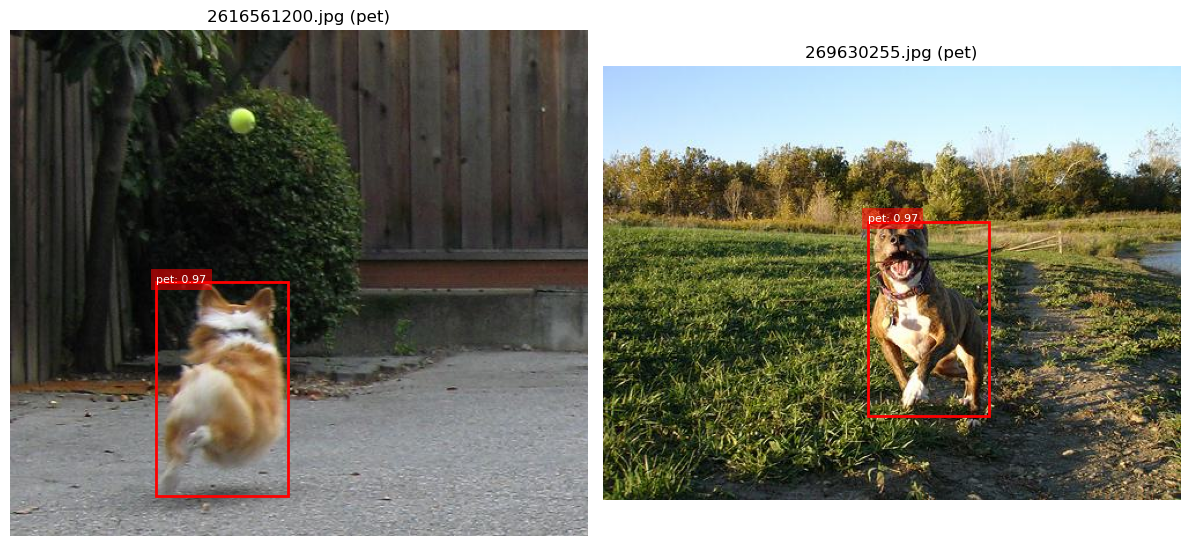


image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\3352791995.jpg: 640x416 1 person, 54.9ms
Speed: 2.0ms preprocess, 54.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\test\325576658.jpg: 448x640 1 person, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


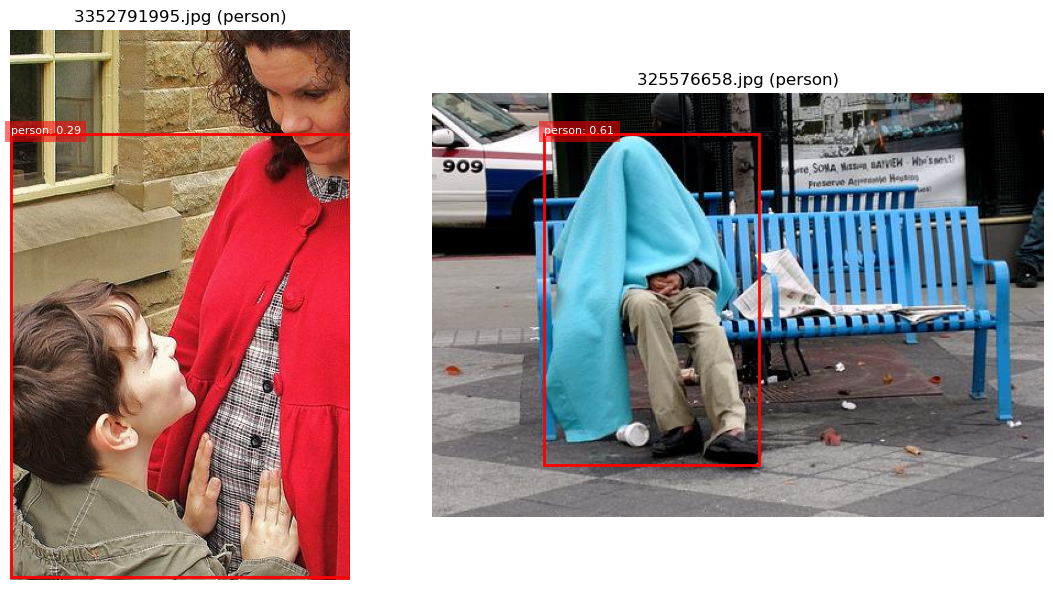

In [9]:
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO

def plot_bbox(ax, image, data, title="YOLO Prediction"):
    """Plots bounding boxes on an image using Matplotlib."""
    ax.imshow(image)
    ax.set_title(title, fontsize=12)
    
    # Plot each bounding box
    for bbox, label, conf in zip(data['bboxes'], data['labels'], data['confidences']):
        x1, y1, x2, y2 = bbox
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        text = f"{label}: {conf:.2f}"
        ax.text(x1, y1, text, color='white', fontsize=8, 
                bbox=dict(facecolor='red', alpha=0.55, edgecolor='none'))
    
    ax.axis('off')

def get_predictions(image_path):
    """Runs YOLO inference and returns bounding box data."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    predictions = model.predict(source=image_path)
    
    data = {'bboxes': [], 'labels': [], 'confidences': []}
    for result in predictions:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            confidence = box.conf[0].item()
            
            data['bboxes'].append((x1, y1, x2, y2))
            data['labels'].append(model.names[class_id])
            data['confidences'].append(confidence)
    
    return image, data

random.seed(35)  # Set seed for reproducibility

# Load your model from the downloaded file
model = YOLO("best.pt")

# Read CSV file with image labels
labels_df = pd.read_csv("final_labeled_images.csv", header=None, names=["filename", "label"])
labels_dict = dict(zip(labels_df.filename, labels_df.label))

test_folder = "datasets/flickr/images/test/"
all_images = [os.path.join(test_folder, f) for f in os.listdir(test_folder)
              if f.lower().endswith('.jpg')]

selected_pets = []
selected_persons = []

random.shuffle(all_images)

# Select two pet images and two person images
for img_path in all_images:
    filename = os.path.basename(img_path)
    if filename not in labels_dict:
        continue
    label = labels_dict[filename]
    if label == "pet" and len(selected_pets) < 2:
        selected_pets.append(img_path)
    elif label == "person" and len(selected_persons) < 2:
        selected_persons.append(img_path)
    if len(selected_pets) == 2 and len(selected_persons) == 2:
        break

# Plot predictions for pet images
fig_pets, axes_pets = plt.subplots(1, 2, figsize=(12, 6))
for ax, img_path in zip(axes_pets, selected_pets):
    image, data = get_predictions(img_path)
    title = os.path.basename(img_path) + f" ({labels_dict[os.path.basename(img_path)]})"
    plot_bbox(ax, image, data, title=title)
plt.tight_layout()
plt.show()

# Plot predictions for person images
fig_persons, axes_persons = plt.subplots(1, 2, figsize=(12, 6))
for ax, img_path in zip(axes_persons, selected_persons):
    image, data = get_predictions(img_path)
    title = os.path.basename(img_path) + f" ({labels_dict[os.path.basename(img_path)]})"
    plot_bbox(ax, image, data, title=title)
plt.tight_layout()
plt.show()